**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Gabriel Colon
- Sia Khorsand
- Paul Kim
- Ava Rubin
- Ivan Smith

# Research Question

How do scandals involving professional athletes, defined as public controversies or legal issues, and subsequent negative media attention impact their on-field performance in specific sports (e.g., football, basketball, baseball) within a defined time frame (e.g., the first five games following the incident)?

## Background and Prior Work


Professional athletes receive a lot of attention both for their personal and professional lives. As a result of this, any crime, or questionable choice they make, is highly publicized, and garners a lot of attention from the media. Because of this, we are interested in seeing if/how negative media attention surrounding a player affects their performance on the field following the 'scandal'. 

An article published in The Eagle provides insights into the societal repercussions of scandals involving professional athletes, emphasizing shifts in public perception and media coverage<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). While there are detailed discussions on how scandals affect athletes' reputations and the public's view of sports figures, there is a noticeable absence of direct references to empirical studies examining the correlation between scandals and athletes' on-field performance. Instead, the focus lies on the broader implications of scandals within the context of professional sports culture, including the erosion of trust in athletes and the idealized image of sportsmanship. The texts suggest that while scandals may tarnish individual reputations and lead to temporary condemnation, they do not directly address empirical evidence linking scandals to changes in athletes' on-field performance.

Additionally, one study found that athletes facing scandal-related stress may experience heightened levels of psychological strain, impacting their focus and confidence on the field<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). Coping strategies discussed, such as seeking social support and employing problem-focused techniques, may be crucial for athletes navigating the fallout from scandals to maintain their mental well-being and sustain optimal performance. Ultimately, the interplay between scandal-induced stress, coping mechanisms, and mental health can significantly influence athletes' ability to perform at their best under pressure.

A dissertation from Florida State University explores the impact of sports scandals, categorizing them into on-field (performance-related) and off-field (non-performance-related) events<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). Through experimental investigation, it finds that both types of scandals have significant effects on sport consumers' team identification and behavioral intentions, with on-field scandals generally eliciting stronger negative reactions. Additionally, the study highlights the moderating role of team identification, indicating that individuals' level of identification with a team influences their responses to sports scandals.

Building upon these prior studies, further research could delve deeper into the mechanisms through which scandals influence athletes' on-field performance across different sports. By considering factors such as media scrutiny, public perception, and internal team dynamics, researchers can provide valuable insights into how athletes navigate and mitigate the effects of off-field controversies on their professional endeavors.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Fein, M. et al. (31 Aug 2013) Quick Take: How have recent scandals changed public perceptions of professional sports and athletes? *The Eagle*. https://www.theeagleonline.com/article/2013/08/quick-take-how-have-recent-scandals-changed-public-perceptions-of-professional-sports-and-athletes
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Nuetzel, B. (16 Nov 2023). Coping strategies for handling stress and providing mental health in Elite Athletes: A Systematic Review. *Frontiers in Sports and Active Living, 5*. https://doi.org/10.3389/fspor.2023.1265783 
2. <a name="cite_note-3"></a> [^](#cite_ref-3) Hamilton, J. M. (2016). The Impact of On-and Off-Field Sports Scandals on Team Identification and Consumer Behavior Intentions *The Florida State University ProQuest Dissertations Publishing*. http://purl.flvc.org/fsu/fd/FSU_2016SP_Hamilton_fsu_0071E_13026


# Hypothesis



Athletes implicated in scandals will exhibit a statistically significant decrease in their on-field performance, measured by key performance indicators (e.g., points scored, assists, rebounds in basketball; goals, assists, saves in soccer; runs, hits, strikeouts in baseball), in the first five games following the scandal compared to their average performance in the five games prior to the scandal.

# Data

## Data overview

Since we are using multiple datasets, we will need to effectively combine them. Our two main sources of data will be player performance, and then relevant news about the major sports leagues. We will cross reference the dates of when the relevant news happened, and then analyze the corresponding players performance following this.

### Tweets about NFL, NBA, MLB in the Last 10 Years

In [28]:
#WILL NOT RUN IN JUPYTER NOTEBOOK
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import csv

options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)
core_url = 'https://twitter.com/search?q=(nfl%20OR%20mlb%20OR%20nba)%20(from%3AMailOnline%20OR%20from%3ATMZ%20OR%20from%3AYahooNews%20OR%20from%3ANYTimes%20OR%20from%3ACNN%20OR%20from%3AFoxNews%20OR%20from%3ANYPost%20OR%20from%3Aguardian%20OR%20from%3ARollingStone%20OR%20from%3ACBS%20OR%20from%3Awashingtonpost)%20until%3A_ENDDATE_%20since%3A_STARTDATE_%20-filter%3Areplies&src=typed_query&f=top'
tweets = []

def new_url(start_month, year):
    end_year = year
    if(start_month == 11):
        end_month = 1
        end_year = year + 1
    else:
        end_month = start_month + 2
    
    
    
    year = str(year)
    end_year = str(end_year)
    start_month = str(start_month)
    end_month = str(end_month)

    target_url = core_url.replace('_STARTDATE_',year+'-'+start_month+'-01').replace('_ENDDATE_',end_year+'-'+end_month+'-01')
    return target_url

def scroll_page():
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#scrape
def scrape_curr_page(start_month,curr_year):
    target_url = new_url(start_month,curr_year)
    driver.get(target_url)
    for i in range(5):
        time.sleep(7)  
        resp = driver.page_source
        soup = BeautifulSoup(resp, 'html.parser')
        
        for tweet in soup.find_all("div", {"data-testid": "cellInnerDiv"}):
            tweet_text_element = tweet.find("div", {"data-testid": "tweetText"})
            if tweet_text_element:
                tweet_text = tweet_text_element.get_text().strip()
            else:
                tweet_text = ""
            
            tweet_user_element = tweet.find('a', href=True) 
            tweet_date_element = tweet.find('time')
            
            if tweet_user_element and tweet_date_element:
                tweet_user = tweet_user_element.get('href')
                tweet_date = tweet_date_element.get('datetime')
                tweets.append({'date': tweet_date, 'text': tweet_text, 'user': tweet_user})
                
        scroll_page()
    
#add to CSV
def write_to_csv():
    csv_file_name = 'tweets.csv'
    fieldnames = ['date', 'text', 'user']
    with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for tweet in tweets:
            clean_text = tweet['text'].replace('\n', ' ')
            writer.writerow({'date': tweet['date'], 'text': clean_text, 'user': tweet['user']})
    print(f"Data has been written to {csv_file_name}")

start_months = [1,3,5,7,9,11]

for year in range(2013,2023):
    for start_month in start_months:
        scrape_curr_page(start_month, year)
        time.sleep(2)

write_to_csv()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=122.0.6261.111)
Stacktrace:
	GetHandleVerifier [0x00007FF77C10AD32+56930]
	(No symbol) [0x00007FF77C07F632]
	(No symbol) [0x00007FF77BF342E5]
	(No symbol) [0x00007FF77BF11D4C]
	(No symbol) [0x00007FF77BFA23F7]
	(No symbol) [0x00007FF77BFB7891]
	(No symbol) [0x00007FF77BF9BA43]
	(No symbol) [0x00007FF77BF6D438]
	(No symbol) [0x00007FF77BF6E4D1]
	GetHandleVerifier [0x00007FF77C486ABD+3709933]
	GetHandleVerifier [0x00007FF77C4DFFFD+4075821]
	GetHandleVerifier [0x00007FF77C4D818F+4043455]
	GetHandleVerifier [0x00007FF77C1A9766+706710]
	(No symbol) [0x00007FF77C08B90F]
	(No symbol) [0x00007FF77C086AF4]
	(No symbol) [0x00007FF77C086C4C]
	(No symbol) [0x00007FF77C076904]
	BaseThreadInitThunk [0x00007FFAE39A7344+20]
	RtlUserThreadStart [0x00007FFAE4CE26B1+33]


This is a custom dataset. We created a python script that uses Selenium and BeautifulSoup to scrape Twitter (X) accounts for tweets that mention the NFL, NBA, or MLB. The accounts we are scraping are majors news publications that tend to report on what we are looking for. This script will create a CSV file with the date, content, and which news outlet the relevant tweet came from.
To further process this dataset, we performed sentiment analysis using the VADER lexicon (as detailed below), to only keep tweets with a negative sentiment, as that is that we are interested in. We also filtered the tweets for each respective league to only be in the relevant timeframe of their season. We are not interested in the off seasons. The CSV returned by this script can be found in our repo, and is titled 'tweets.csv'

### All Players Across History
In order to figure out which tweets were about active players when they were written, we needed a dataset of all active players for each league across time, with the players name and years they were active. To do this, we scraped the website https://www.basketball-reference.com for the NBA, and https://www.pro-football-reference.com for the NFL. Since there were only ~15 tweets in the MLB dataframe after cleaning, we could look through it by hand and determine which players were active and relevant.

Below is the script to scrape for NFL players. The script for NBA players is similar, and both can be located in the Scripts directory. The following script is titled NFLPlayers.py, and the other is NBAPlayers.py. The output of these scripts are all_NFL_players.csv and all_NBA_players.csv, respectively.

In [ ]:
#WILL NOT RUN IN JUPYTER NOTEBOOK
from bs4 import BeautifulSoup
import requests
import re

import csv
import string


core_url = 'https://www.pro-football-reference.com/players/LETTER/'
players = []

def new_url(letter):
    target_url = core_url.replace('LETTER',letter)
    return target_url

#scrape
def scrape_curr_page(letter):
    target_url = new_url(letter)
    response = requests.get(target_url)
    
    soup = BeautifulSoup(response.content, 'html.parser')
    players_div = soup.find('div', id='div_players')

    for p_tag in players_div.find_all('p'):
        name = p_tag.find('a').text
        p_text = p_tag.text
        position_years = re.search(r'\((.*?)\)\s*(\d{4}-\d{4})', p_text)
    
        if position_years:
            position = position_years.group(1)
            years = position_years.group(2).split('-')
        else:
            position = ''
            years = ['', '']

        players.append({
            'Name': name,
            'Position': position,
            'Start Year': years[0],
            'End Year': years[1]
        })
    
#add to CSV
def write_to_csv():
    csv_file_name = 'all_NFL_players.csv'
    fieldnames = ['Name', 'Position', 'Start Year', 'End Year']
    with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for player in players:
            writer.writerow(player)
    print(f"Data has been written to {csv_file_name}")


for letter in list(string.ascii_uppercase):
    scrape_curr_page(letter)

write_to_csv()

ModuleNotFoundError: No module named 'requests'

### Relevant Player Statistics
Once we had narrowed down which players had negative media attention, we could move on to collecting data about each of these players. Since there was <10 players remaining, we could collect this data by hand. For the NFL, we used fantasy data from the site https://fantasydata.com/nfl. For the MLB and NBA players, we used actual game statistics, from https://www.espn.com. For the NBA, we simply used points scored per game. For the MLB, we used the OPS metric, which stands for On-base Plus Slugging. This is a metric meant to combine how well a hitter can reach base, with how well he can hit for average and for power (from https://www.mlb.com/glossary/standard-stats/on-base-plus-slugging). We also included a column for each player with their average of their respective metric, for use in EDA and drawing conclusions.

In [29]:
MLBStats = pd.read_csv('MLBStats.csv')
MLBStats.head()

,Player,Position,Date,OPS,Average OPS
0,Ryan Braun,RF,2013-07-21,0.869,0.869
1,Ryan Braun,RF,2013-07-20,0.873,0.869
2,Ryan Braun,RF,2013-07-19,0.875,0.869
3,Ryan Braun,RF,2013-07-09,0.887,0.869
4,Ryan Braun,RF,2013-06-09,0.890,0.869


In [30]:
NBAStats = pd.read_csv('NBAStats.csv')
NBAStats.head()

,Player,Position,Date,Points,Average Points (Season)
0,Malik Monk,SG,2020-02-25,8,11.7
1,Malik Monk,SG,2020-02-22,15,11.7
2,Malik Monk,SG,2020-02-20,25,11.7
3,Malik Monk,SG,2020-02-12,25,11.7
4,Malik Monk,SG,2020-02-10,17,11.7


In [31]:
NFLStats = pd.read_csv('NFLStats.csv')
NFLStats.head()

,Player,Position,Date,Fantasy Points,Average Points (Season)
0,Odell Beckham Jr.,WR,2015-09-13,4.4,15.6
1,Odell Beckham Jr.,WR,2015-09-20,20.6,15.6
2,Odell Beckham Jr.,WR,2015-09-24,13.9,15.6
3,Odell Beckham Jr.,WR,2015-10-04,3.8,15.6
4,Odell Beckham Jr.,WR,2015-10-11,18.4,15.6


# Results

## Exploratory Data Analysis

### Exploring the Collected Tweets
After scraping X (Twitter) for tweets about athletes over the last decade to create the tweets.csv dataset, we now need to clean and analyze what we collected. To do so, we first got rid of any duplicate tweets that were scraped. Then we used the VADER lexicon to perform a sentiment analysis on the remaining tweets, as we are focusing only on negative media attention. 

In [32]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [33]:
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ghawk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Import the custom tweets dataset, then cleaning to allow for accurate and easier exploration

In [34]:
df = pd.read_csv('tweets.csv')
df = df.drop_duplicates()
df['date'] = pd.to_datetime(df['date'])
df['user'] = df['user'].str.replace('/','',regex=False)

Perform sentiment analysis on the tweets using the VADER lexicon in order to determine if the tweets are negative, as desired

In [35]:
analyser = SentimentIntensityAnalyzer()

In [36]:
df['compound'] = df['text'].apply(lambda x: analyser.polarity_scores(x)['compound'])
df = df[df['compound'] <= -0.05]
df.reset_index(drop=True, inplace=True)

Create subframe of tweets for NBA and filter to only contain tweets from the season

In [37]:
NBA_df = df[df['text'].str.contains('NBA', case=False)]
NBA_df = NBA_df[NBA_df['date'].dt.month.isin([10,11,12,1,2,3,4])]
NBA_df.head()

,date,text,user,compound
0,2013-01-02 18:01:25+00:00,NBA Legend Latrell Sprewell -- ARRESTED for Bl...,TMZ,-0.8374
15,2013-10-10 23:42:20+00:00,NBA Star Kendrick Perkins -- ARRESTED ... Alle...,TMZ,-0.5904
22,2013-11-21 04:30:39+00:00,Did you see the STRUGGLE SUIT former NBA’er Tr...,TMZ,-0.5147
23,2013-12-18 01:24:11+00:00,Watch Paul McCartney hit all five stages of gr...,RollingStone,-0.4939
26,2013-11-06 18:26:24+00:00,Dwight Howard -- Fan Detained After Striking N...,TMZ,-0.1027


Create subframe of tweets for MLB and filter to only contain tweets from the season. Since this ending up being a small dataframe, we can immediately export it to a CSV so we can see what the relevant tweets were.

In [38]:
MLB_df = df[df['text'].str.contains('MLB', case=False)]
MLB_df = MLB_df[MLB_df['date'].dt.month.isin([3,4,5,6,7,8,9,10])]
MLB_df.to_csv('MLB_tweets.csv', sep=',', index=False, encoding='utf-8')

Create subframe of tweets for NFL and filter to only contain tweets from the season

In [39]:
NFL_df = df[df['text'].str.contains('NFL', case=False)]
NFL_df = NFL_df[NFL_df['date'].dt.month.isin([8,9,10,11,12,1,2])]
NFL_df.head()

,date,text,user,compound
1,2013-02-04 21:46:04+00:00,"NFL finds ""no indication"" that Beyonce caused ...",RollingStone,-0.2960
4,2013-08-29 04:20:00+00:00,Read our full in-depth story about NFL player ...,RollingStone,-0.7845
5,2013-08-31 16:45:07+00:00,Patriots drop Tim Tebow after just 12 weeks; N...,nypost,-0.2732
7,2013-08-31 15:23:07+00:00,"Aaron Hernandez was a promising NFL player, bu...",RollingStone,-0.7634
8,2013-08-28 18:06:04+00:00,Aaron Hernandez might have been one of the NFL...,RollingStone,-0.8140


Import the custom dataset we created of all active NFL players in history, then filter it to only include active players in the last 10 years

In [40]:
NFL_players_df = pd.read_csv('all_NFL_players.csv')
NFL_players_df = NFL_players_df[NFL_players_df['Start Year'] >= 2013]
list_of_NFL = NFL_players_df['Name'].tolist()

Cross reference this player database with the tweets, and only keep tweets that mention active players. Then, export the remaining tweets to a CSV for further use.

In [41]:
NFL_df['contains_player'] = NFL_df['text'].apply(lambda x: any(name in x for name in list_of_NFL))
NFL_df = NFL_df[NFL_df['contains_player']]
NFL_df.to_csv('NFL_tweets.csv', sep=',', index=False, encoding='utf-8')

Repeat the same steps for the NBA

In [42]:
NBA_players_df = pd.read_csv('all_NBA_players.csv')
NBA_players_df = NBA_players_df[NBA_players_df['From Year'] >= 2013]
list_of_NBA = NBA_players_df['Player Name'].tolist()

In [43]:
NBA_df['contains_player'] = NBA_df['text'].apply(lambda x: any(name in x for name in list_of_NBA))
NBA_df = NBA_df[NBA_df['contains_player']]
NBA_df.to_csv('NBA_tweets.csv', sep=',', index=False, encoding='utf-8')

After running all of these cells, we were left with 3 CSV files--one for each league. These files contain about 5-15 tweets each, of what are thought to be the most relevant tweets for our research. After opening up and taking a further look at the output, we were left with only 7 relevant tweets about players. Since there were only 7 players to analyze stats for, we did this by hand, and created 3 more datasets. These datasets are further described in the previous section, under the title 'Relevant Player Statistics'. 

### Player Performance Before and After Their Scandal

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

Text(0.5, 1.0, 'NBA Player Malik Monk Points Before & After Scandal')

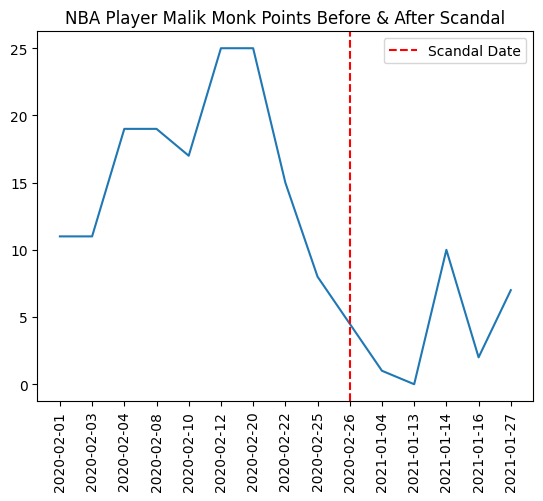

In [4]:
nba_stats = pd.read_csv('NBAStats.csv')
nba_stats = nba_stats.sort_values(by='Date')
plt.plot(nba_stats['Date'], nba_stats['Points'])
plt.xticks(rotation='vertical')
plt.axvline(x='2020-02-26', color='r', linestyle='--', label='Scandal Date')
plt.legend()
plt.title('NBA Player Malik Monk Points Before & After Scandal')

In [38]:
nfl_stats = pd.read_csv('NFLStats.csv')
nfl_stats = nfl_stats.sort_values(by='Date')

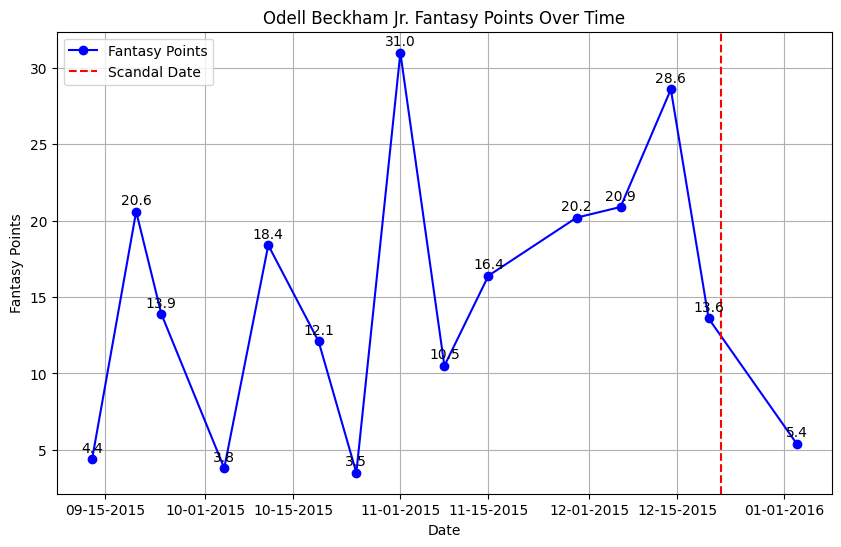

In [39]:
def plot_player_fantasy_points(player_name, nfl_stats, scandal_dates=None):
    # Filter data for the specified player
    player_data = nfl_stats[nfl_stats['Player'] == player_name]

    # Convert Date 
    player_data.loc[:, 'Date'] = pd.to_datetime(player_data.loc[:, 'Date'])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['Date'].values, player_data['Fantasy Points'].values, marker='o', linestyle='-', color='b', label='Fantasy Points')

    # Check if scandal dates are provided, and plot the vertical lines
    if scandal_dates:
        for scandal_date in scandal_dates:
            scandal_date = pd.to_datetime(scandal_date)
            plt.axvline(x=scandal_date, color='r', linestyle='--', label='Scandal Date')

    # Annotate data points with Fantasy Points values
    for index, row in player_data.iterrows():
        plt.annotate(str(row['Fantasy Points']),
                     (row['Date'], row['Fantasy Points']),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center')

    plt.title(f'{player_name} Fantasy Points Over Time')
    plt.xlabel('Date')
    plt.ylabel('Fantasy Points')

    # Format X-axis dates as MM-DD-YYYY
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
scandal_dates = ['2015-12-22']
plot_player_fantasy_points('Odell Beckham Jr.', nfl_stats, scandal_dates=scandal_dates)

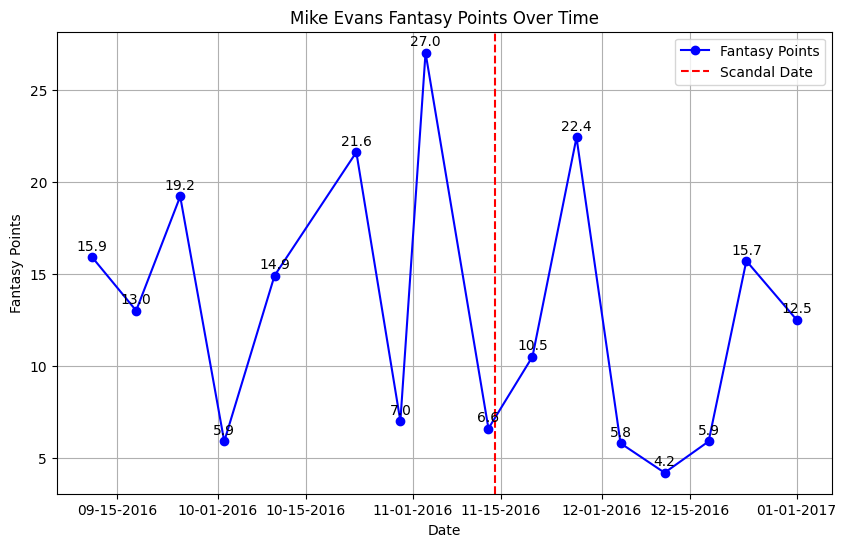

In [40]:
scandal_dates = ['11/14/16']
plot_player_fantasy_points('Mike Evans', nfl_stats, scandal_dates=scandal_dates)

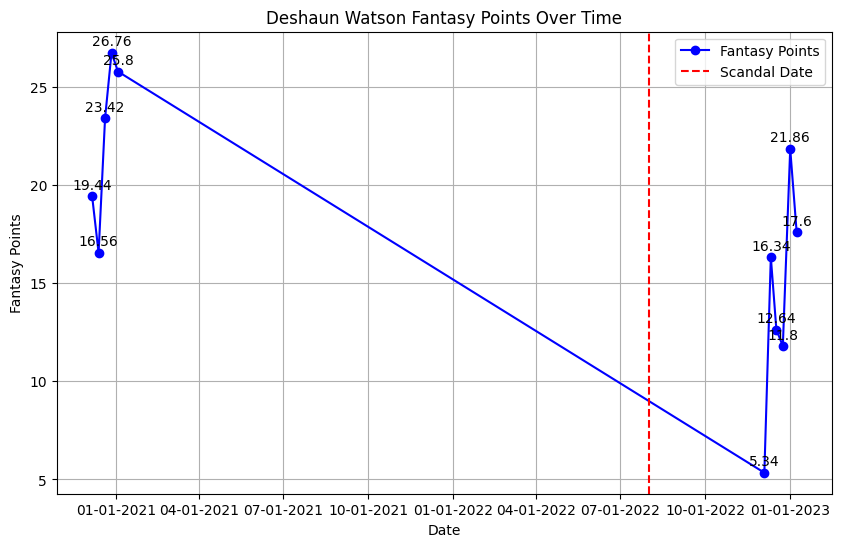

In [41]:
scandal_dates = ['8/1/22']
plot_player_fantasy_points('Deshaun Watson', nfl_stats, scandal_dates=scandal_dates)

In [42]:
mlb_stats = pd.read_csv('MLBStats.csv')
mlb_stats = mlb_stats.sort_values(by='Date')

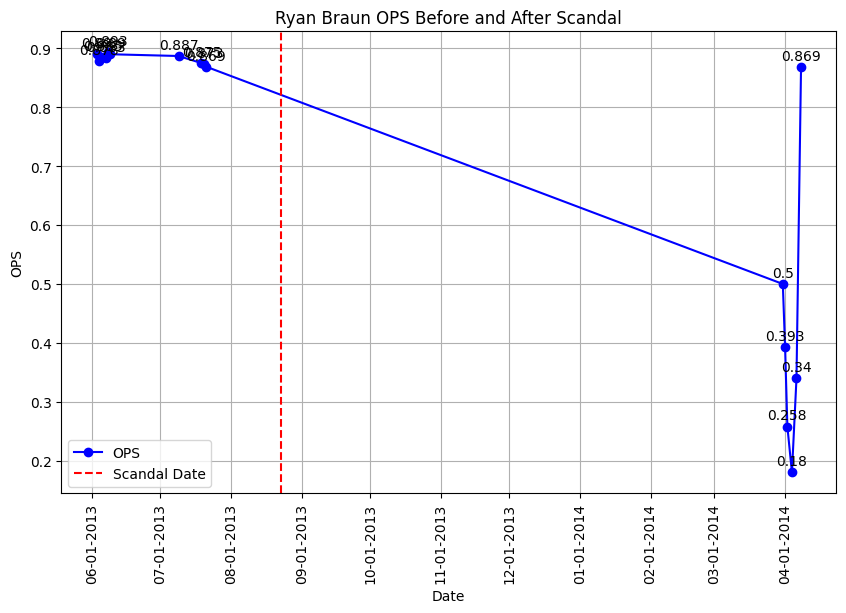

In [47]:
def plot_player_fantasy_points(player_name, mlb_stats, scandal_dates=None):
    # Filter data for the specified player
    player_data = mlb_stats[mlb_stats['Player'] == player_name]

    # Convert Date 
    player_data.loc[:, 'Date'] = pd.to_datetime(player_data.loc[:, 'Date'])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['Date'].values, player_data['OPS'].values, marker='o', linestyle='-', color='b', label='OPS')

    # Check if scandal dates are provided, and plot the vertical lines
    if scandal_dates:
        for scandal_date in scandal_dates:
            scandal_date = pd.to_datetime(scandal_date)
            plt.axvline(x=scandal_date, color='r', linestyle='--', label='Scandal Date')

    # Annotate data points with Fantasy Points values
    for index, row in player_data.iterrows():
        plt.annotate(str(row['OPS']),
                     (row['Date'], row['OPS']),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center')

    plt.title(f'{player_name} OPS Before and After Scandal')
    plt.xlabel('Date')
    plt.ylabel('OPS')

    # Format X-axis dates as MM-DD-YYYY
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()
    

# Example
scandal_dates = ['8/23/13']
plot_player_fantasy_points('Ryan Braun', mlb_stats, scandal_dates=scandal_dates)

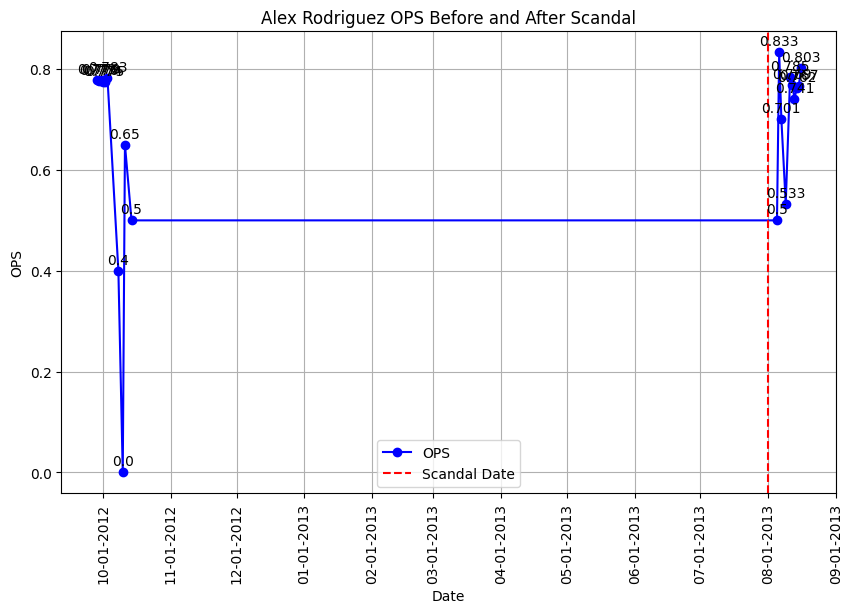

In [48]:
scandal_dates = ['8/1/13']
plot_player_fantasy_points('Alex Rodriguez', mlb_stats, scandal_dates=scandal_dates)

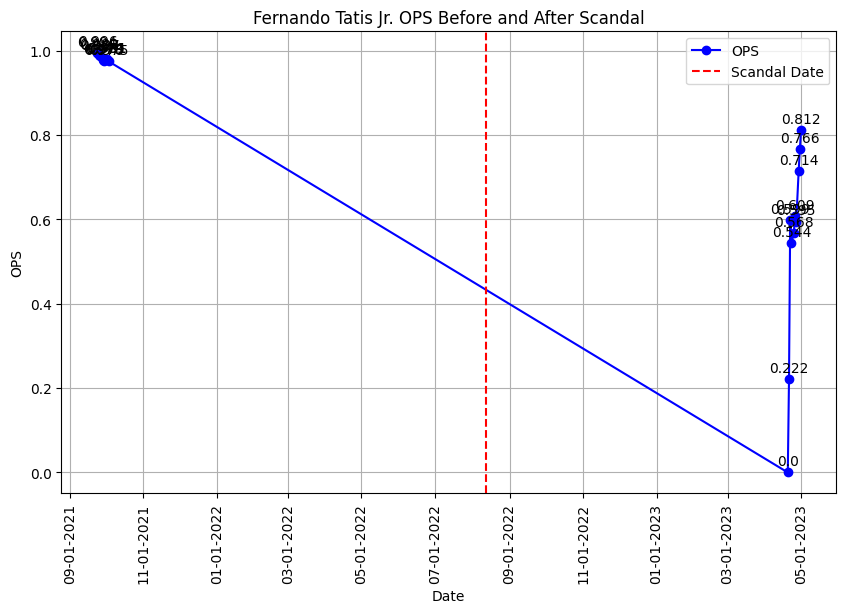

In [49]:
scandal_dates = ['8/12/22']
plot_player_fantasy_points('Fernando Tatis Jr.', mlb_stats, scandal_dates=scandal_dates)

# Ethics & Privacy

Our project acknowledges potential biases and privacy concerns associated with analyzing the impact of scandals on professional athletes' performance. The data collection, which relies on media reports and performance statistics, may inherently reflect biases based on media attention, potentially skewing the analysis towards more high-profile athletes or incidents. This could result in an unbalanced representation of athletes from different backgrounds or sports, raising concerns about the equitable analysis of the dataset. Furthermore, the sensitive nature of the data, which involves personal scandals, poses significant privacy and ethical challenges. It is crucial to ensure that the data handling and analysis processes respect the privacy of the individuals involved, adhering to data protection laws and ethical standards.

To address these issues, we will employ a multifaceted approach. Firstly, we will anonymize the data to protect individuals' identities, ensuring that our analysis does not unjustly expose or target specific athletes. Secondly, we plan to use statistical methods to identify and correct for any biases present in our dataset, such as overrepresentation of certain demographics or types of scandals. This includes conducting a thorough pre-analysis to understand the dataset's composition and applying corrective measures during the analysis phase. Lastly, we commit to transparently communicating the limitations of our study, including potential biases and the steps taken to mitigate them, in our final report. By acknowledging and actively addressing these ethical and privacy concerns, we aim to conduct our research responsibly and contribute valuable insights into the field.

# Team Expectations 


In addition to [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md)...

- We will communicate via an SMS group chat
- Attend all group meetings as possible, and communicate ASAP if you are unable to attend
- Complete the work expected of you by the agreed upon deadline
    - Communicate if unable to or need help
- Respond to each other's messages in the group chat in a timely manner (<= 24 hours)
- Everybody contributes equally to the project
- Respect each other’s ideas
    - No bad ideas, no stupid questions
- Respect everyone’s skill level, and play to our strengths
- If issues arise, address them immediately
    - First talk about it within the team (either text, call, or in person)
    - If issue persists or was unable to be solved internally, talk to our TA 

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 02/09  |  5 PM | Brainstorm topics/questions  | Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 02/11  | 3 PM |  Do background research on topic, begin finding datasets, begin writing ethcs section | Finalize & submit project proposal | 
| 02/16  | 5 PM  | Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/18  | 3 PM  | Wrap up what we didn't get done during meeting | Review and discuss wrangling more if need be   |
| 2/23  | 5 PM  | Import & Wrangle Data; EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan; Start Checkpoint 1 |
| 2/25  | 3 PM  | Wrap up what we didn't get done during meeting | Group check in on progess, Complete Checkpoint 1 |
| 3/1  | 5 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete Analysis |
| 3/3  | 3 PM  | Wrap up what we didn't get done during meeting | Group check in on progess |
| 3/8  | 5 PM  | Draft results/conclusion/discussion | Finalize Results/Conclusion/Discussion; Start Checkpoint 2 |
| 3/10  | 3 PM  | Wrap up Checkpoint 2 | Discuss and turn in checkpoint 2 |
| 3/15  | 5 PM  | Review final project | Discuss/edit full project |
| 3/20  | 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |